In [1]:
import h5py
import numpy as np
from typing import List,Dict 
import os
import argparse
import datetime
from ingest_data import load_elemental, load_peram, reverse_perambulator_time
import gamma as gamma
# from displacement import displacement_map
# from displacement import deriv_names

import scipy 
from scipy import sparse

{1: array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j],
       [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j],
       [0.-0.j, 0.-1.j, 0.+0.j, 0.+0.j],
       [0.-1.j, 0.-0.j, 0.+0.j, 0.+0.j]]), 2: array([[ 0.+0.j,  0.+0.j,  0.-0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.-0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]]), 3: array([[ 0.+0.j,  0.+0.j,  0.+1.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -0.-1.j],
       [ 0.-1.j,  0.-0.j,  0.+0.j,  0.+0.j],
       [ 0.-0.j,  0.+1.j,  0.+0.j,  0.+0.j]]), 4: array([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]]), 5: array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])}


In [2]:
print(gamma.gamma[2])
print(gamma.gamma[4])
print(gamma.gamma[5])

[[ 0.+0.j  0.+0.j  0.-0.j -1.+0.j]
 [ 0.+0.j  0.+0.j  1.-0.j  0.-0.j]
 [ 0.+0.j  1.-0.j  0.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


In [3]:
num_vecs = 32
Lt=96 
num_tsrcs = 24 
h5_path = os.path.abspath('/home/grant/jureca_exolaunch')
peram_dir = os.path.join(h5_path, 'perams_sdb', f'numvec{num_vecs}', f'tsrc-{num_tsrcs}')
meson_dir = os.path.join(h5_path, 'meson_sdb', f'numvec{num_vecs}')
peram_file = os.path.join(peram_dir,"peram_32_cfg101.h5")
meson_file = os.path.join(meson_dir,"meson-32_cfg101.h5")


print(f"Reading propagator file: {peram_file}")
print(f"Reading meson elementals file: {meson_file}")
meson_elemental = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_1')
peram = load_peram(peram_file, Lt, num_vecs, num_tsrcs)

peram_back = reverse_perambulator_time(peram)


Reading propagator file: /home/grant/jureca_exolaunch/perams_sdb/numvec32/tsrc-24/peram_32_cfg101.h5
Reading meson elementals file: /home/grant/jureca_exolaunch/meson_sdb/numvec32/meson-32_cfg101.h5
Reading meson elementals file: /home/grant/jureca_exolaunch/meson_sdb/numvec32/meson-32_cfg101.h5


Reading propagator file: /home/grant/jureca_exolaunch/perams_sdb/numvec32/tsrc-24/peram_32_cfg101.h5


Computing the time-reversed perambulator


gamma[5] shape: (4, 4)
peramb_reverse shape: (24, 96, 4, 4, 32, 32)


In [4]:
# define local operators using gamma matrices 
import scipy as scp
import gamma 
I = np.identity(4)
I_dist = scp.sparse.csr_matrix(np.identity(96))
I_sparse = scp.sparse.csr_matrix(I)
g5_block = scp.sparse.kron(I,gamma.gamma[5],format='csr')
g5_sparse = scp.sparse.csr_matrix(gamma.gamma[5])
g4_block = scp.sparse.kron(I,gamma.gamma[4],format='csr')
g4_sparse = scp.sparse.csr_matrix(gamma.gamma[4])
g3_block = scp.sparse.kron(I,gamma.gamma[3],format='csr')
g3_sparse = scp.sparse.csr_matrix(gamma.gamma[3])
g2_block = scp.sparse.kron(I,gamma.gamma[2],format='csr')
g2_sparse = scp.sparse.csr_matrix(gamma.gamma[2])
g1_block = scp.sparse.kron(I,gamma.gamma[1],format='csr')
g1_sparse = scp.sparse.csr_matrix(gamma.gamma[1])


gamma_i_block = [g1_block,g2_block,g3_block]
#to be looped over based on value of i index in derivative 

gamma_i = [gamma.gamma[1],gamma.gamma[2],gamma.gamma[3],gamma.gamma[4]]
gamma_i_sparse = [g1_sparse,g2_sparse,g3_sparse]
from dataclasses import dataclass
@dataclass
class IrrepNames:
    wp:str         ## Irrep with parity
    np: str          ## Irrep no parity
    ferm: bool          ## Is this a double cover?
    lg: bool            ## LG?
    dim: int            ## dimension
    G: int              ## G-parity
    
irrep_names_no_par = {
  "A1": IrrepNames(wp= "A1", np= "A1", ferm= False, lg= False, dim= 1, G= 0),
  "A2": IrrepNames(wp= "A2", np= "A2", ferm= False, lg= False, dim= 1, G= 0),
  "T1": IrrepNames(wp= "T1", np= "T1", ferm= False, lg= False, dim= 3, G= 0),
  "T2": IrrepNames(wp= "T2", np= "T2", ferm= False, lg= False, dim= 3, G= 0),
  "E": IrrepNames(wp= "E", np= "E", ferm= False, lg= False, dim= 2, G= 0),
}


## Single derivative operators of type $\bar{\psi_2}\Gamma_i\overrightarrow{D_j} \psi_1$
The displacements in the displacement list that we include here are :

- disp_1 
- disp_2
- disp_3

which using the `IrrepNames' class will extract the info out of the rows from table in 
https://arxiv.org/pdf/0707.4162 and form a matrix of hermitian operators, thus possessing the qualities: 
- complex valued square matrix 
- equiv. to its conjugazte transpose 
- 

see https://web.mit.edu/~joshlin/www/dox/deriv__quark__displacement__w_8cc_source.html
D acts only on $\psi_1$

with gamma structure $\gamma_4\gamma_5\gamma_i$

PionxNabla_T1 source 

In [16]:
Nt = 96
nop = 3
# load 1 derivative elementals

# for pion this should be just 1 
# if doing all mesons in chroma gamma table then increase the nops 


nabla_i = np.zeros((Nt,3,num_vecs,num_vecs),dtype=np.cdouble) 
# these are shape (96,96)
D1 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_1')
D2 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_2')
D3 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_3')

print(D1.shape)
# D1D1 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_1_1')

g5 = gamma.gamma[5]
g4 = gamma.gamma[4]
g3 = gamma.gamma[3]

g2 = gamma.gamma[2]

g1 = gamma.gamma[1]

gamma_i = [gamma.gamma[1],gamma.gamma[2],gamma.gamma[3],gamma.gamma[4]]

# these should now become dense in distillation space 
# D operator acting on the jth laplacian 
pix_nabla = np.zeros((Nt,nop), dtype=np.cdouble)  # Shape (96,4,200) for each tsrc
# D_i = 

## operator insertion with elemental ## 
## insertion needs: gamma structure, derivative, irrep projection, momentum 
# D1_phi_0 = scipy.sparse.kron(D1[0],gamma_i[0]@g5)

D1_phi_0 = np.einsum("ij,ab->ijab", g5, D1[0])
D2_phi_0 = np.einsum("ij,ab->ijab", g5, D2[0])
D3_phi_0 = np.einsum("ij,ab->ijab", g5, D3[0])

phi_0 = D1_phi_0 @ D2_phi_0 @ D3_phi_0
print('phi',phi_0)
# D1D1_phi_0_1 = np.einsum("ij,ab->ijab", gamma_i[0] @ g5@g4, D1D1[0])
# D1D1_phi_0_2 = np.einsum("ij,ab->ijab", gamma_i[1] @ g5@g4, D1D1[0])

# D1D1_phi_0 = D1D1_phi_0_1 + D1D1_phi_0_2

# D1D2_phi_0_1 = np.einsum("ij,ab->ijab", gamma_i[0] @ g5@g4, D1D2[0])
# D1D2_phi_0_2 = np.einsum("ij,ab->ijab", gamma_i[1] @ g5@g4, D1D2[0])
# D1D2_phi_0_3 = np.einsum("ij,ab->ijab", gamma_i[2] @ g5@g4, D1D2[0])

# D1D2_phi_0 = D1D2_phi_0_1 + D1D2_phi_0_2 + D1D2_phi_0_3

# D1D3_phi_0_1 = np.einsum("ij,ab->ijab", gamma_i[0] @ g5@g4, D1D3[0])
# D1D3_phi_0_2 = np.einsum("ij,ab->ijab", gamma_i[1] @ g5@g4, D1D3[0])
# D1D3_phi_0_3 = np.einsum("ij,ab->ijab", gamma_i[2] @ g5@g4, D1D3[0])
# D1D3_phi_0_4 = np.einsum("ij,ab->ijab", gamma_i[3] @ g5@g4, D1D3[0])

# D1D3_phi_0 = D1D3_phi_0_1 + D1D3_phi_0_2 + D1D3_phi_0_3+ D1D3_phi_0_4

# D1D1_phi_0 = scipy.sparse.kron(D1D1[0],gamma_i[0]@g5)+ scipy.sparse.kron(D1D1[0],gamma_i[1]@g5) 

# D1D2_phi_0 = scipy.sparse.kron(D1D2[0],gamma_i[0]@g5)+ scipy.sparse.kron(D1D2[0],gamma_i[1]@g5) 

# D1D3_phi_0 = scipy.sparse.kron(D1D3[0],gamma_i[0]@g5)+ scipy.sparse.kron(D1D3[0],gamma_i[1]@g5) + scipy.sparse.kron(D1D3[0],gamma_i[2]@g5)

for tsrc in range(1):
    for t in range(Lt):
        D1_phi_t = np.einsum("ij,ab->ijab", g5, D1[t])
        D2_phi_t = np.einsum("ij,ab->ijab", g5, D2[t])
        D3_phi_t = np.einsum("ij,ab->ijab", g5, D3[t])

        phi_t = D1_phi_t @ D2_phi_t @ D3_phi_t


        # D1D1_phi_0_1 = np.einsum("ij,ab->ijab", gamma_i[0] @ g5@g4, D1D1[t])
        # D1D1_phi_0_2 = np.einsum("ij,ab->ijab", gamma_i[1] @ g5@g4, D1D1[t])

        # D1D1_phi_t = D1D1_phi_0_1 + D1D1_phi_0_2

        

        # phi_t = np.einsum("ij,ab->ijab", gamma.gamma[5], D1[t], optimize='optimal')
        # print(phi_t.shape)
        # D1_phi_t = scipy.sparse.kron(D1[t],gamma_i[0]@g5)
        # print(D1_phi_t.shape)

        # D1D1_phi_t = scipy.sparse.kron(D1D1[t],gamma_i[0]@g5)+ scipy.sparse.kron(D1D1[t],gamma_i[1]@g5) 

        # D1D2_phi_t = scipy.sparse.kron(D1D2[t],gamma_i[0]@g5)+ scipy.sparse.kron(D1D2[t],gamma_i[1]@g5) 

        # D1D3_phi_t = scipy.sparse.kron(D1D3[t],gamma_i[0]@g5)+ scipy.sparse.kron(D1D3[t],gamma_i[1]) + scipy.sparse.kron(D1D3[t],gamma_i[2]@g5)
       
        tau = peram[tsrc, t, :, :, :, :]
        tau_ = peram_back[tsrc, t, :, :, :, :]
        
        contracted_result_1 = np.einsum("ijab,jkbc,klcd,lida", phi_t, tau, phi_0, tau_, optimize='optimal')
        # contracted_result_1 = np.einsum("ijab,jkbc,klcd,lida", D1_phi_t, tau, D1_phi_0, tau_, optimize='optimal')

        # contracted_result_2 = np.einsum("ijab,jkbc,klcd,lida", D2_phi_t, tau, D2_phi_0, tau_, optimize='optimal')
        # contracted_result_3 = np.einsum("ijab,jkbc,klcd,lida", D3_phi_t, tau, D3_phi_0, tau_, optimize='optimal')
        # contracted_result_11 = np.einsum("ijab,jkbc,klcd,lida", D1D1_phi_t, tau, D1D1_phi_0, tau_, optimize='optimal')
        # contracted_result_12 = np.einsum("ijab,jkbc,klcd,lida", D1D2_phi_t, tau, D1D2_phi_0, tau_, optimize='optimal')
        # contracted_result_13 = np.einsum("ijab,jkbc,klcd,lida", D1D3_phi_t, tau, D1D3_phi_0, tau_, optimize='optimal')
        
        # Store the contracted result in the pion array (Lt, nop,200)
        # pix_nabla[t,0] = contracted_result_1
        # pix_nabla[t,1] = contracted_result_2
        # pix_nabla[t,2] = contracted_result_3

        # pix_nabla[t,1] = contracted_result_11
        # pix_nabla[t,2] = contracted_result_12
        # pix_nabla[t,3] = contracted_result_13

pion = contracted_result_1.real
print('pion',pion)

# we have 

Reading meson elementals file: /home/grant/jureca_exolaunch/meson_sdb/numvec32/meson-32_cfg101.h5


  0%|          | 0/96 [00:00<?, ?it/s]

Reading meson elementals file: /home/grant/jureca_exolaunch/meson_sdb/numvec32/meson-32_cfg101.h5


Reading meson elementals file: /home/grant/jureca_exolaunch/meson_sdb/numvec32/meson-32_cfg101.h5


(96, 32, 32)
phi [[[[ 1.30503708e-03+7.39584071e-04j -4.32710737e-04+8.80336796e-05j
    -2.48599476e-04-3.12991675e-04j ...  2.24615885e-05-4.92281000e-04j
    -1.51758382e-04-8.42678518e-05j -3.69282714e-04-3.65144665e-05j]
   [ 8.19272344e-04+7.49820415e-05j -6.83248848e-04+2.50369754e-04j
    -2.58712940e-04-2.21045917e-04j ... -4.14759070e-04-3.36540299e-04j
     7.92472687e-05-7.07084171e-04j -4.67987469e-04+1.13600568e-03j]
   [ 4.45437126e-04-3.01955960e-04j  2.64384484e-04+3.55701010e-04j
    -4.08489169e-04-4.49208920e-04j ... -7.68616849e-04+2.17948166e-04j
    -3.10913461e-05-7.14469860e-04j  2.08320763e-04+6.25585802e-04j]
   ...
   [-8.24751871e-05-4.83009660e-04j  6.15241043e-04-8.19824116e-05j
     7.06229585e-04+2.32169209e-05j ...  7.11760116e-05-4.27436879e-04j
     2.88539795e-04+2.33499606e-04j  6.55686314e-04-4.27176552e-04j]
   [-1.49832049e-03+5.27102043e-04j  4.52960658e-04+3.65389041e-04j
    -2.20182875e-04+1.63883688e-04j ... -8.46362059e-05+1.05231892e-03j


ValueError: x and y must have same first dimension, but have shapes (96,) and (1,)

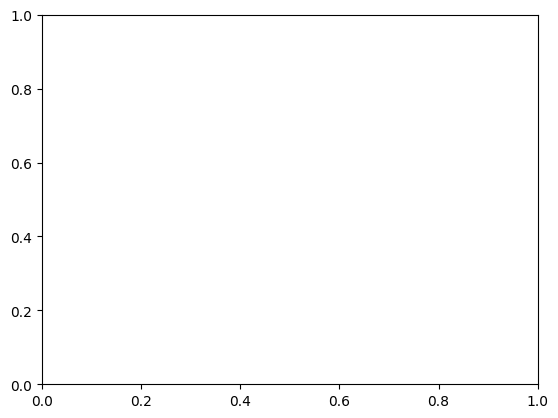

In [18]:
import matplotlib.pyplot as plt
plt.plot(np.arange(Lt),pion, '.')
plt.yscale('log')

## Two derivative operators 
These include the D,B,E derivative operators 

In [ ]:

D1D2 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_1_2')
D2D1 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_2_1')

D1D3 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_1_3')
D3D1 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_3_1')

D2D3 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_2_3')
D3D2 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_3_2')

D1D2_phi_0_1 = np.einsum("ij,ab->ijab", gamma_i[0] @ g5@g4, D1D2[t])
D1D2_phi_0_2 = np.einsum("ij,ab->ijab", gamma_i[1] @ g5@g4, D1D2[t])
D1D2_phi_0_3 = np.einsum("ij,ab->ijab", gamma_i[2] @ g5@g4, D1D2[t])

D1D2_phi_t = D1D2_phi_0_1 + D1D2_phi_0_2 + D1D2_phi_0_3

D1D3_phi_0_1 = np.einsum("ij,ab->ijab", gamma_i[0] @ g5@g4, D1D3[t])
D1D3_phi_0_2 = np.einsum("ij,ab->ijab", gamma_i[1] @ g5@g4, D1D3[t])
D1D3_phi_0_3 = np.einsum("ij,ab->ijab", gamma_i[2] @ g5@g4, D1D3[t])
D1D3_phi_0_4 = np.einsum("ij,ab->ijab", gamma_i[3] @ g5@g4, D1D3[t])

D1D3_phi_t = D1D3_phi_0_1 + D1D3_phi_0_2 + D1D3_phi_0_3+ D1D3_phi_0_4

In [7]:
# load 2 derivative elementals
pixB = np.zeros((Nt,4),dtype=np.cdouble)
D2 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_2')
D2D1 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_2_1')
D2D2 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_2_2')
D2D3 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_2_3')

g5 = gamma.gamma[5]
g4 = gamma.gamma[4]
gamma_i = [gamma.gamma[1],gamma.gamma[2],gamma.gamma[3],gamma.gamma[4]]

# these should now become dense in distillation space 
# B operator acting on the jth laplacian 

D2_phi_0 = np.einsum("ij,ab->ijab", gamma_i[0]@g5@g4, D2[0])

D2D1_phi_0_1 = np.einsum("ij,ab->ijab", gamma_i[0] @ g5@g4, D2D1[0])
D2D1_phi_0_2 = np.einsum("ij,ab->ijab", gamma_i[1] @ g5@g4, D2D1[0])

D2D1_phi_0 = D2D1_phi_0_1 + D2D1_phi_0_2

D2D2_phi_0_1 = np.einsum("ij,ab->ijab", gamma_i[0] @ g5@g4, D2D2[0])
D2D2_phi_0_2 = np.einsum("ij,ab->ijab", gamma_i[1] @ g5@g4, D2D2[0])
D2D2_phi_0_3 = np.einsum("ij,ab->ijab", gamma_i[2] @ g5@g4, D2D2[0])

D2D2_phi_0 = D1D2_phi_0_1 + D1D2_phi_0_2 + D1D2_phi_0_3

D2D3_phi_0_1 = np.einsum("ij,ab->ijab", gamma_i[0] @ g5@g4, D2D3[0])
D2D3_phi_0_2 = np.einsum("ij,ab->ijab", gamma_i[1] @ g5@g4, D2D3[0])
D2D3_phi_0_3 = np.einsum("ij,ab->ijab", gamma_i[2] @ g5@g4, D2D3[0])
D2D3_phi_0_4 = np.einsum("ij,ab->ijab", gamma_i[3] @ g5@g4, D2D3[0])

D2D3_phi_0 = D2D3_phi_0_1 + D2D3_phi_0_2 + D2D3_phi_0_3+ D2D3_phi_0_4

for tsrc in range(num_tsrcs):
    for t in range(Lt):
        D2_phi_t = np.einsum("ij,ab->ijab", gamma_i[0]@g5@g4, D2[t])

        D2D1_phi_0_1 = np.einsum("ij,ab->ijab", gamma_i[0] @ g5@g4, D2D1[t])
        D2D1_phi_0_2 = np.einsum("ij,ab->ijab", gamma_i[1] @ g5@g4, D2D1[t])

        D2D1_phi_t = D2D1_phi_0_1 + D2D1_phi_0_2

        D2D2_phi_0_1 = np.einsum("ij,ab->ijab", gamma_i[0] @ g5@g4, D2D2[t])
        D2D2_phi_0_2 = np.einsum("ij,ab->ijab", gamma_i[1] @ g5@g4, D2D2[t])
        D2D2_phi_0_3 = np.einsum("ij,ab->ijab", gamma_i[2] @ g5@g4, D2D2[t])

        D2D2_phi_t = D1D2_phi_0_1 + D1D2_phi_0_2 + D1D2_phi_0_3

        D2D3_phi_0_1 = np.einsum("ij,ab->ijab", gamma_i[0] @ g5@g4, D2D3[t])
        D2D3_phi_0_2 = np.einsum("ij,ab->ijab", gamma_i[1] @ g5@g4, D2D3[t])
        D2D3_phi_0_3 = np.einsum("ij,ab->ijab", gamma_i[2] @ g5@g4, D2D3[t])
        D2D3_phi_0_4 = np.einsum("ij,ab->ijab", gamma_i[3] @ g5@g4, D2D3[t])

        D2D3_phi_t = D2D3_phi_0_1 + D2D3_phi_0_2 + D2D3_phi_0_3+ D2D3_phi_0_4

        # phi_t = np.einsum("ij,ab->ijab", gamma.gamma[5], D1[t], optimize='optimal')
        # print(phi_t.shape)
        # D1_phi_t = scipy.sparse.kron(D1[t],gamma_i[0]@g5)
        # print(D1_phi_t.shape)

        # D1D1_phi_t = scipy.sparse.kron(D1D1[t],gamma_i[0]@g5)+ scipy.sparse.kron(D1D1[t],gamma_i[1]@g5) 

        # D1D2_phi_t = scipy.sparse.kron(D1D2[t],gamma_i[0]@g5)+ scipy.sparse.kron(D1D2[t],gamma_i[1]@g5) 

        # D1D3_phi_t = scipy.sparse.kron(D1D3[t],gamma_i[0]@g5)+ scipy.sparse.kron(D1D3[t],gamma_i[1]) + scipy.sparse.kron(D1D3[t],gamma_i[2]@g5)
       
        tau = peram[tsrc, t, :, :, :, :]
        tau_ = peram_back[tsrc, t, :, :, :, :]
        
        contracted_result_1 = np.einsum("ijab,jkbc,klcd,lida", D2_phi_t, tau, D2_phi_0, tau_, optimize='optimal')
        contracted_result_11 = np.einsum("ijab,jkbc,klcd,lida", D2D1_phi_t, tau, D2D1_phi_0, tau_, optimize='optimal')
        contracted_result_12 = np.einsum("ijab,jkbc,klcd,lida", D2D2_phi_t, tau, D2D2_phi_0, tau_, optimize='optimal')
        contracted_result_13 = np.einsum("ijab,jkbc,klcd,lida", D2D3_phi_t, tau, D2D3_phi_0, tau_, optimize='optimal')
        
        # Store the contracted result in the pion array (Lt, nop,200)
        pixB[t,0] = contracted_result_1
        pixB[t,1] = contracted_result_11
        pixB[t,2] = contracted_result_12
        pixB[t,3] = contracted_result_13


print(pixB.real)
plt.plot(np.arange(Lt), pixB.real[:, :], '.')
plt.yscale('log')


Reading meson elementals file: /home/grant/jureca_exolaunch/meson_sdb/numvec32/meson-32_cfg101.h5


Reading meson elementals file: /home/grant/jureca_exolaunch/meson_sdb/numvec32/meson-32_cfg101.h5


Reading meson elementals file: /home/grant/jureca_exolaunch/meson_sdb/numvec32/meson-32_cfg101.h5


Reading meson elementals file: /home/grant/jureca_exolaunch/meson_sdb/numvec32/meson-32_cfg101.h5


NameError: name 'D1D2_phi_0_1' is not defined

In [2]:
from scipy import sparse 
# load 3 derivative elementals
D_i = np.zeros((Nt,4,num_vecs,num_vecs),dtype=np.cdouble)
# DxDy is hermitian conjugate of DyDx 

D3 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_3')
D3D1 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_3_1')
D3D2 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_3_2')
D3D3 = load_elemental(meson_file, Lt, num_vecs, mom='mom_0_0_0', disp='disp_3_3')


# form gi_Di

# form g4_g5_gi_Bi
D3_phi_0 = np.einsum("ij,ab->ijab", gamma_i_sparse[0], D3[0])

for tsrc in range(num_tsrcs):
    for t in range(Nt):
        #D3_phi_t = np.einsum("ij,ab->ijab", gamma.gamma[5], meson_elemental[t], optimize='optimal')#
        D3_phi_t = scipy.sparse.kron(D3,gamma_i[0]) + scipy.sparse.kron()
        tau = peram[tsrc, t, :, :, :, :]
        tau_ = peram_back[tsrc, t, :, :, :, :]
        # Contract pion, assuming the 200 dimension comes from an appropriate contraction of indices
        contracted_result = np.einsum("ijab,jkbc,klcd,lida", phi_t, tau, phi_0, tau_, optimize='optimal')
        
        # Store the contracted result in the pion array (Lt, 200)
        pion[t] = contracted_result  # Ensure this matches the dimension of 200.

    pion = pion.real
        



NameError: name 'np' is not defined

In [ ]:

pion = np.zeros(Lt, dtype=np.cdouble)  # Shape (96, 200) for each tsrc
phi_0 = np.einsum("ij,ab->ijab", gamma.gamma[5], meson_elemental[0])

for tsrc in range(num_tsrcs):
    for t in range(Lt):
        phi_t = np.einsum("ij,ab->ijab", gamma.gamma[5], meson_elemental[t], optimize='optimal')
        tau = peram[tsrc, t, :, :, :, :]
        tau_ = peram_back[tsrc, t, :, :, :, :]
        # Contract pion, assuming the 200 dimension comes from an appropriate contraction of indices
        contracted_result = np.einsum("ijab,jkbc,klcd,lida", phi_t, tau, phi_0, tau_, optimize='optimal')
        
        # Store the contracted result in the pion array (Lt, 200)
        pion[t] = contracted_result  # Ensure this matches the dimension of 200.

    pion = pion.real
    h5_group.create_dataset(f'tsrc_{tsrc}/cfg_{cfg_id}', data=pion)

    if show_plot:
        plt.plot(np.arange(Lt), pion[:, 0], '.', label=f'Pion Distribution (first column) - tsrc {tsrc}, cfg {cfg_id}')
        plt.yscale('log')
        plt.legend()
        plt.savefig(f'pion-{cfg_id}-tsrc-{tsrc}-{num_vecs}-{datetime.datetime.today()}.pdf')

print(f"Cfg {cfg_id} processed successfully.")
return True


In [ ]:
def run(cfg_ids, num_vecs, num_tsrcs, task_id,show_plot=False):
    h5_path = os.path.abspath('/p/scratch/exotichadrons/exolaunch')
    Lt = 96  
    peram_dir = os.path.join(h5_path, 'perams_sdb', f'numvec{num_vecs}', f'tsrc-{num_tsrcs}')
    meson_dir = os.path.join(h5_path, 'meson_sdb', f'numvec{num_vecs}')

    h5_output_file = f'pion_2pt_nvec_{num_vecs}_tsrc_{num_tsrcs}_task{task_id}.h5'
    with h5py.File(h5_output_file, "w") as h5f:
        h5_group = h5f.create_group('pion_000')
        for cfg_id in cfg_ids:
            try:
                processed = process_configuration(cfg_id, num_vecs, num_tsrcs, peram_dir, meson_dir, Lt, h5_group, show_plot)
                if not processed:
                    print(f"Skipping configuration {cfg_id} file is missing")
            except FileNotFoundError as e:
                print(e)

        print(f"All cfgs processed & saved to {h5_output_file}.")

cfg_ids =  ["11"]
nvec = 96 
num_tsrcs = 24 
show_plot = False
task_id = 1

run(cfg_ids, num_vecs=nvec, num_tsrcs, show_plot,task_id)